<h1 style="text-align: center;">Variable INFLACION</h1>

Cargamos el DataSet

In [1]:
import pandas as pd

dataset_work_3 = pd.read_csv('D:\DataSet\dataset_work_8.csv')
x = dataset_work_3.iloc[:,:-1]
y = dataset_work_3.iloc[:,-1].values
dataset_work_3.columns

Index(['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG',
       'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP', 'PERCEPCIONES',
       'MONTO_PERCEPCIONES_COEF', 'PERCEPCIONES_MONTO_IMPONIBLE_LOG',
       'RETENCIONES_MONTO_IMPONIBLE_LOG', 'TIENE_EMPLEADOS',
       'EMPLEADO_PREDICTED_TAMANO', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD_YJ', 'INFLACION', 'MOROSIDAD'],
      dtype='object')

In [2]:
dataset_work_3.shape

(6435823, 18)

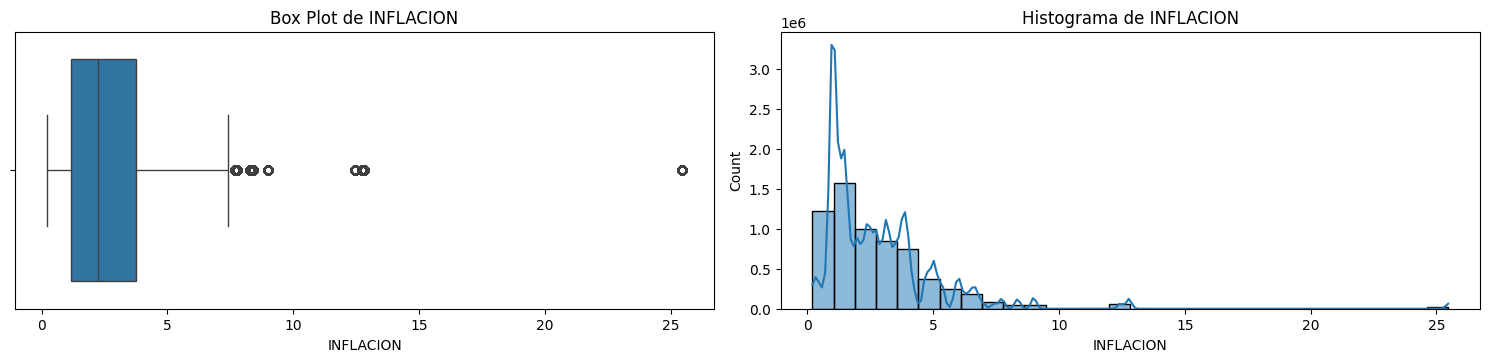

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_3['INFLACION'])
plt.title('Box Plot de INFLACION')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_3['INFLACION'], bins=30, kde=True)
plt.title('Histograma de INFLACION')


# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

In [4]:
def calcular_estadisticas_completas(df, columna):
    # Obtener estadísticas básicas con describe()
    estadisticas = dataset_work_3[columna].describe()
    
    # Calcular estadísticas adicionales
    estadisticas['asimetria'] = df[columna].skew()
    estadisticas['curtosis'] = df[columna].kurtosis()
    estadisticas['varianza'] = df[columna].var()
    
    return estadisticas

# Llamada a la función
estadisticas_completas = calcular_estadisticas_completas(dataset_work_3, 'INFLACION')
display(estadisticas_completas)

count        6.435823e+06
mean         2.816494e+00
std          2.361172e+00
min          2.000000e-01
25%          1.180000e+00
50%          2.250000e+00
75%          3.740000e+00
max          2.547000e+01
asimetria    3.642947e+00
curtosis     2.594936e+01
varianza     5.575134e+00
Name: INFLACION, dtype: float64

In [5]:
# Lista de variables numéricas a analizar
variables = ['INFLACION']
outliers_summary = {}

# Calcular outliers usando IQR para cada variable
for variable in variables:
    Q1 = dataset_work_3[variable].quantile(0.25)
    Q3 = dataset_work_3[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar outliers
    outliers = dataset_work_3[(dataset_work_3[variable] < lower_bound) | (dataset_work_3[variable] > upper_bound)]
    
    # Guardar resultados en un diccionario
    outliers_summary[variable] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': len(outliers)
    }

# Convertir el resumen de outliers en un DataFrame para una mejor visualización
outliers_summary_dataset_work_3 = pd.DataFrame(outliers_summary).T

print(outliers_summary_dataset_work_3)

           Lower Bound  Number of Outliers  Upper Bound
INFLACION        -2.66            204733.0         7.58


In [6]:
# Contamos cuántas veces aparece cada valor en la variable EMPLEADOS
conteo_empleados = dataset_work_3['INFLACION'].value_counts().sort_index()

# Añadimos etiquetas más descriptivas para cada valor
conteo_empleados_etiquetado = conteo_empleados.rename_axis('Cantidad de INFLACION').reset_index(name='Frecuencia')

# Mostramos los primeros valores del conteo con etiquetas
print("\nValores de INFLACION con sus respectivas frecuencias:")
print(conteo_empleados_etiquetado)  # Mostramos solo los primeros valores


Valores de INFLACION con sus respectivas frecuencias:
     Cantidad de INFLACION  Frecuencia
0                     0.20       41216
1                     0.25       41141
2                     0.40       88571
3                     0.60       44631
4                     0.74       41511
..                     ...         ...
124                   9.00       43055
125                  12.44       20494
126                  12.75       20126
127                  12.81       19369
128                  25.47       18969

[129 rows x 2 columns]


In [7]:
# Contar los valores que son iguales a 0
cantidad_cero = (dataset_work_3['INFLACION'] == 0).sum()

# Contar los valores que están entre 0 y 10 (excluyendo 0)
cantidad_negativa = (dataset_work_3['INFLACION'] < 0).sum()

# Contar los valores que son mayores a 10
cantidad_mas_de_0 = (dataset_work_3['INFLACION'] > 0).sum()

# Mostrar los resultados
print(f"Cantidad de valores igual a 0 en INFLACION: {cantidad_cero}")
print(f"Cantidad de valores negativos INFLACION: {cantidad_negativa}")
print(f"Cantidad de valores mayores a 0 en INFLACION: {cantidad_mas_de_0}")


Cantidad de valores igual a 0 en INFLACION: 0
Cantidad de valores negativos INFLACION: 0
Cantidad de valores mayores a 0 en INFLACION: 6435823


### Análisis de las características de los datos:

1. **Distribución**:
   - La variable **INFLACION** presenta una fuerte **asimetría positiva**, lo cual indica que tiene valores extremos o outliers en el lado derecho (valores altos).
   - El **box plot** y el **histograma** confirman esta asimetría, con varios valores muy superiores al cuartil superior, lo que genera sesgo.

2. **Correlación**:
   - Actualmente, la correlación de **INFLACION** con otras variables importantes es baja. Los valores atípicos o extremos pueden estar afectando negativamente estas correlaciones y, por lo tanto, el rendimiento de los modelos.


Para determinar el **mejor método** para mejorar la correlación de la variable **INFLACION** y gestionar los **outliers**, seguiré un enfoque sistemático basado en las características de los datos, las herramientas disponibles y la naturaleza del problema. Vamos a evaluar cada método y elegir el más adecuado basado en criterios técnicos:


## Creamos la variable **INFLACION_LOG**

El mejor método para este caso es la **transformación logarítmica** debido a:

- **Asimetría positiva**: Dado que INFLACION tiene una clara asimetría hacia valores altos, la transformación logarítmica es la mejor opción para estabilizar la varianza y reducir la influencia de los valores extremos.
- **Mejora de la correlación**: Esta transformación puede mejorar la relación de INFLACION con otras variables, haciendo que los modelos predictivos funcionen mejor.
- **Conservación de datos**: No elimina outliers ni datos valiosos, simplemente ajusta su escala, lo que es importante en un dataset tan grande.
  




In [8]:
import numpy as np

# Aplicar la transformación logarítmica a la variable INFLACION
dataset_work_3['INFLACION_LOG'] = np.log1p(dataset_work_3['INFLACION'])  # log1p se usa para evitar problemas con ceros


In [9]:
dataset_work_3.columns

Index(['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG',
       'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP', 'PERCEPCIONES',
       'MONTO_PERCEPCIONES_COEF', 'PERCEPCIONES_MONTO_IMPONIBLE_LOG',
       'RETENCIONES_MONTO_IMPONIBLE_LOG', 'TIENE_EMPLEADOS',
       'EMPLEADO_PREDICTED_TAMANO', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD_YJ', 'INFLACION', 'MOROSIDAD', 'INFLACION_LOG'],
      dtype='object')

In [10]:
# Asegúrate de que las columnas de tu DataFrame estén en el orden correcto y eliminando las que no necesites
columns_order = ['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG',
       'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP', 'PERCEPCIONES',
       'MONTO_PERCEPCIONES_COEF', 'PERCEPCIONES_MONTO_IMPONIBLE_LOG',
       'RETENCIONES_MONTO_IMPONIBLE_LOG', 'TIENE_EMPLEADOS',
       'EMPLEADO_PREDICTED_TAMANO', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD_YJ', 'INFLACION', 'INFLACION_LOG', 'MOROSIDAD']

# Reorganizar las columnas del DataFrame
dataset_work_3 = dataset_work_3[columns_order]

In [11]:
# Eliminar las columnas especificadas
columnas_a_eliminar = ['INFLACION']

# Usamos el método drop() para eliminar las columnas
dataset_work_3.drop(columns=columnas_a_eliminar, inplace=True)

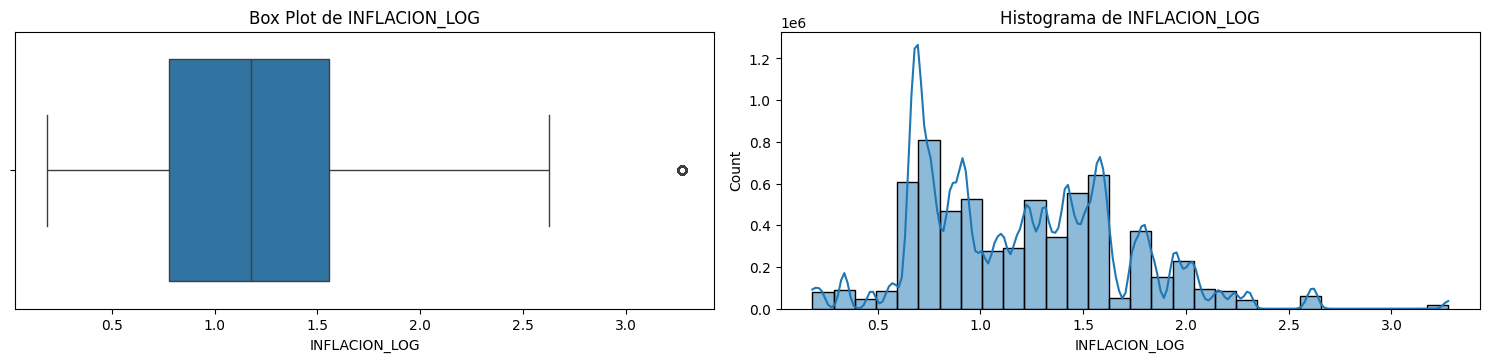

In [12]:
# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_3['INFLACION_LOG'])
plt.title('Box Plot de INFLACION_LOG')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_3['INFLACION_LOG'], bins=30, kde=True)
plt.title('Histograma de INFLACION_LOG')


# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

In [13]:
# Lista de variables numéricas a analizar
variables = ['INFLACION_LOG']
outliers_summary = {}

# Calcular outliers usando IQR para cada variable
for variable in variables:
    Q1 = dataset_work_3[variable].quantile(0.25)
    Q3 = dataset_work_3[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar outliers
    outliers = dataset_work_3[(dataset_work_3[variable] < lower_bound) | (dataset_work_3[variable] > upper_bound)]
    
    # Guardar resultados en un diccionario
    outliers_summary[variable] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': len(outliers)
    }

# Convertir el resumen de outliers en un DataFrame para una mejor visualización
outliers_summary_dataset_work_3 = pd.DataFrame(outliers_summary).T

print(outliers_summary_dataset_work_3)

               Lower Bound  Number of Outliers  Upper Bound
INFLACION_LOG    -0.385744             18969.0     2.721106


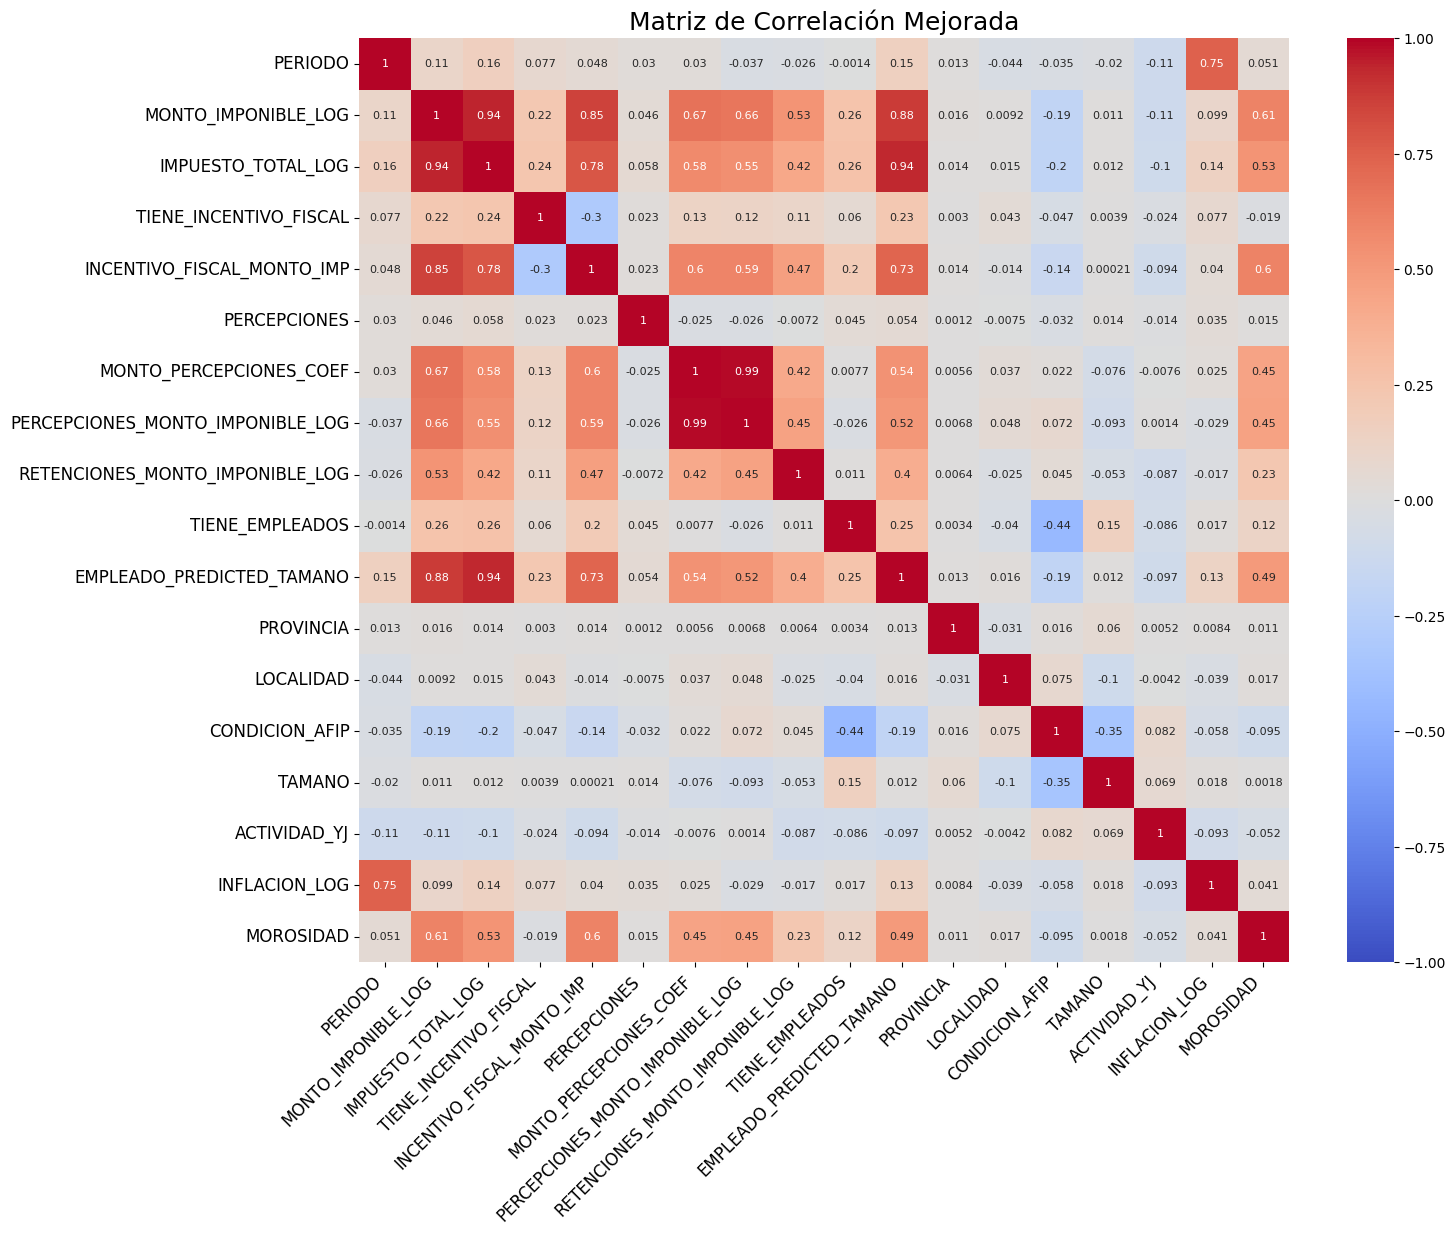

In [14]:
# Calculamos la matriz de correlación
correlation_matrix = dataset_work_3.corr()

# Ajustamos el tamaño de la figura y el tamaño de los números
plt.figure(figsize=(15, 12))  # Aumentamos el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})  # Ajustamos el tamaño de las anotaciones
plt.title('Matriz de Correlación Mejorada', fontsize=18)  # Título más grande
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotamos y ajustamos las etiquetas del eje X
plt.yticks(fontsize=12)  # Ajustamos las etiquetas del eje Y
plt.show()

### Conclusión:

La **transformación logarítmica** ha demostrado ser una **solución efectiva** para mejorar la distribución de la variable **INFLACION**, reducir la cantidad de outliers y aumentar las correlaciones con otras variables importantes. A continuación te detallo la justificación:

- **Reducción significativa de outliers**: Pasar de más de 200,000 outliers a menos de 19,000 implica una gran mejora en la calidad de los datos sin necesidad de eliminar datos valiosos.
- **Mejoras en correlación**: Las correlaciones de **INFLACION_LOG** son más altas con otras variables clave como **AÑO**, **IMPUESTO_TOTAL_LOG**, y **ACTIVIDAD**, lo que indica que la transformación ha ayudado a que estas relaciones sean más claras para los modelos.
- **Mejora en la distribución**: La variable ahora tiene una distribución más simétrica y centrada, lo que es beneficioso para modelos lineales y otros que asumen normalidad en los datos.

### Resguardamos el DataSet

Resguardamos el dataset resultante en un nuevo archivo para poder seguir procesandolo.

In [15]:
import pandas as pd

# Especifica el nombre del archivo CSV donde se guardarán los datos
output_file = 'D:\DataSet\dataset_work_9.csv'


# Guarda el DataFrame en un archivo CSV
dataset_work_3.to_csv(output_file, index=False, encoding='utf-8')

# Mensaje de confirmación
print(f'DataFrame guardado en {output_file}')

DataFrame guardado en D:\DataSet\dataset_work_9.csv
